<h1 style ="color:maroon;">PREDICTING WINE VARIETY</h1>

<br>

<p style="color:indigo;font-size:16px;"><em>About the dataset :</em></p>

<table>
<thead>
  <tr>
    <th>Name</th>
    <th>Description</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td>User name </td>
    <td>User_name of the reviewer<br></td>
  </tr>
  <tr>
    <td>Country</td>
    <td>The country that the wine is from</td>
  </tr>
  <tr>
    <td>Review_title</td>
    <td>The title of the wine review, which often contains the vintage</td>
  </tr>
  <tr>
    <td>Review_description</td>
    <td>A verbose review of the wine</td>
  </tr>
  <tr>
    <td>Designation</td>
    <td>The vineyard within the winery where the grapes that made the wine are from</td>
  </tr>
  <tr>
    <td>Points</td>
    <td>Ratings given by the user. The ratings are between 0 -100</td>
  </tr>
  <tr>
    <td>Price</td>
    <td>The cost for a bottle of the wine</td>
  </tr>
  <tr>
    <td>Province</td>
    <td>The province or state that the wine is from</td>
  </tr>
  <tr>
    <td>Region_1</td>
    <td>The wine-growing area in a province or state (ie Napa)</td>
  </tr>
  <tr>
    <td>Region_2</td>
    <td>Sometimes there are more specific regions specified within a wine-growing area (ie Rutherford inside the Napa Valley), but this value can sometimes be blank</td>
  </tr>
  <tr>
    <td>Winery</td>
    <td>The winery that made the wine</td>
  </tr>
  <tr>
    <td>Variety</td>
    <td>The type of grapes used to make the wine.</td>
  </tr>
</tbody>
</table>

<br>

<h2 style ="color:maroon;">1. Importing the necessary libraries</h2>

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h2 style ="color:maroon;">2. Importing the necessary data</h2>

In [4]:
train = pd.read_csv('Data/train.csv')
test  = pd.read_csv('Data/test.csv')

<p style="color:indigo;font-size:16px;"><em>High-level details about the train</em></p>

In [6]:
train.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,NaN,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay
1,@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend
2,NaN,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo
3,@vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,@vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,Château du Cèdre,Malbec


<p style="color:indigo;font-size:16px;"><em>Dimensions of the train set</em></p>

In [10]:
print("Dimensions of the train set :",train.shape)

Dimensions of the train set : (82657, 12)


<p style="color:indigo;font-size:16px;"><em>Columns with missing values in train</em></p>

In [21]:
missing_meta_train = pd.DataFrame(train.isnull().sum(),columns=['missing values'])
missing_meta_train

,missing values
user_name,19393
country,35
review_title,0
review_description,0
designation,23647
points,0
price,5569
province,35
region_1,12754
region_2,46708


<p style="color:indigo;font-size:16px;"><em>High-level details about the test</em></p>

In [18]:
test.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery
0,@paulgwine,US,Boedecker Cellars 2011 Athena Pinot Noir (Will...,Nicely differentiated from the companion Stewa...,Athena,88,35.0,Oregon,Willamette Valley,Willamette Valley,Boedecker Cellars
1,@wineschach,Argentina,Mendoza Vineyards 2012 Gran Reserva by Richard...,"Charred, smoky, herbal aromas of blackberry tr...",Gran Reserva by Richard Bonvin,90,60.0,Mendoza Province,Mendoza,NaN,Mendoza Vineyards
2,@vboone,US,Prime 2013 Chardonnay (Coombsville),"Slightly sour and funky in earth, this is a re...",NaN,87,38.0,California,Coombsville,Napa,Prime
3,@wineschach,Argentina,Bodega Cuarto Dominio 2012 Chento Vineyard Sel...,"This concentrated, midnight-black Malbec deliv...",Chento Vineyard Selection,91,20.0,Mendoza Province,Mendoza,NaN,Bodega Cuarto Dominio
4,@kerinokeefe,Italy,SassodiSole 2012 Brunello di Montalcino,"Earthy aromas suggesting grilled porcini, leat...",NaN,90,49.0,Tuscany,Brunello di Montalcino,NaN,SassodiSole


<p style="color:indigo;font-size:16px;"><em>Dimensions of the test set</em></p>

In [19]:
print("Dimensions of the test set :",test.shape)

Dimensions of the test set : (20665, 11)


<p style="color:indigo;font-size:16px;"><em>Columns with missing values in test</em></p>

In [22]:
missing_meta_test = pd.DataFrame(test.isnull().sum(),columns=['missing values'])
missing_meta_test

,missing values
user_name,4738
country,4
review_title,0
review_description,0
designation,5989
points,0
price,1394
province,4
region_1,3314
region_2,11751


<h2 style ="color:maroon;">3. Exploratory data analysis</h2>

<h3 style ="color:darkred;">3.1 Univariate analysis</h3>

<h4 style ="color:crimson;">3.1.1 Analyzing country</h4>

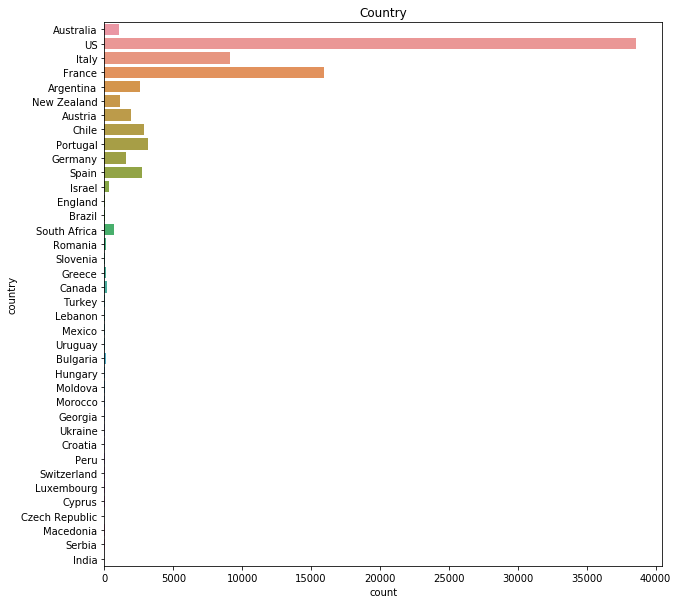

In [34]:
plt.figure(figsize=(10,10))
plt.title("Country")
sns.countplot(y=train['country'])

In [120]:
train['country'].describe()

count     82622
unique       38
top          US
freq      38573
Name: country, dtype: object

<h4 style ="color:crimson;">3.1.2 Analyzing Destination</h4>

In [35]:
train['designation'].describe()

count       59010
unique      26424
top       Reserve
freq         1382
Name: designation, dtype: object

Top 20 designations with their frequency

In [37]:
train['designation'].value_counts()[:20]

Reserve                 1382
Estate                   898
Reserva                  743
Estate Grown             425
Riserva                  415
Barrel sample            303
Dry                      287
Brut                     283
Brut Rosé                226
Estate Bottled           224
Vieilles Vignes          217
Barrel Sample            198
Crianza                  184
Gran Reserva             161
Old Vine                 153
Tradition                150
Rosé of                  119
Réserve                  103
Rosé                      97
Bien Nacido Vineyard      96
Name: designation, dtype: int64

<h4 style ="color:crimson;">3.1.3 Analyzing points</h4>

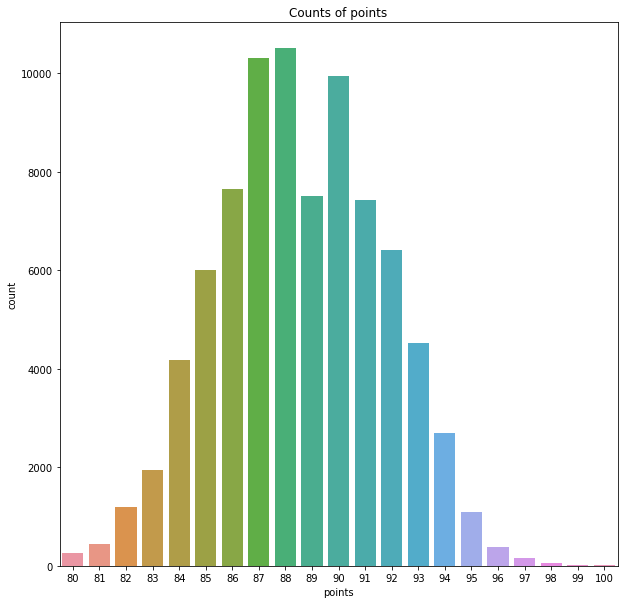

In [81]:
plt.figure(figsize=(10,10))
plt.title("Counts of points")
sns.countplot(train['points'])

In [41]:
train['points'].value_counts()

88     10504
87     10306
90      9929
86      7641
89      7495
91      7421
92      6412
85      5999
93      4522
84      4174
94      2704
83      1951
82      1184
95      1094
81       433
96       382
80       254
97       166
98        49
99        25
100       12
Name: points, dtype: int64

<h4 style ="color:crimson;">3.1.4 Analyzing price</h4>

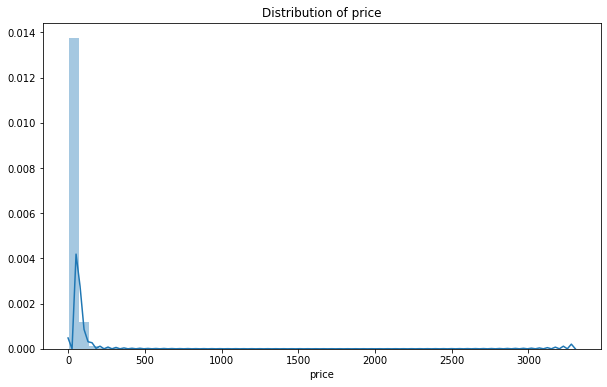

In [80]:
plt.figure(figsize=(10,6))
plt.title("Distribution of price")
sns.distplot(train['price'])

In [52]:
train['price'].describe().T

count    77088.000000
mean        36.922232
std         43.698346
min          4.000000
25%         18.000000
50%         27.000000
75%         45.000000
max       3300.000000
Name: price, dtype: float64

<h4 style ="color:crimson;">3.1.5 Analyzing province</h4>

In [54]:
train['province'].describe()

count          82622
unique           358
top       California
freq           25736
Name: province, dtype: object

Top 20 provinces with frequency

In [63]:
train['province'].value_counts()[:20]

California            25736
Washington             6060
Bordeaux               4690
Oregon                 3900
Tuscany                3780
Burgundy               3179
Mendoza Province       2287
Piedmont               2226
New York               1978
Alsace                 1664
Northern Spain         1448
Champagne              1300
Loire Valley           1026
Provence                956
Douro                   951
Northeastern Italy      907
Southwest France        852
Mosel                   834
Beaujolais              834
Catalonia               794
Name: province, dtype: int64

<h4 style ="color:crimson;">3.1.6 Analyzing region_1</h4>

In [66]:
train['region_1'].describe()

count           69903
unique           1019
top       Napa Valley
freq             3334
Name: region_1, dtype: object

Top 20 region_1 with thier frequency

In [67]:
train['region_1'].value_counts()[:20]

Napa Valley                3334
Columbia Valley (WA)       2951
Russian River Valley       2362
California                 1902
Willamette Valley          1739
Mendoza                    1584
Alsace                     1445
Paso Robles                1376
Champagne                  1300
Barolo                     1293
Sonoma Coast               1188
Finger Lakes               1167
Sonoma County               917
Toscana                     860
Chianti Classico            836
Carneros                    796
Sta. Rita Hills             768
Walla Walla Valley (WA)     748
Brunello di Montalcino      663
Rioja                       663
Name: region_1, dtype: int64

<h4 style ="color:crimson;">3.1.7 Analyzing region_2</h4>

In [68]:
train['region_2'].describe()

count             35949
unique               17
top       Central Coast
freq               7503
Name: region_2, dtype: object

region_1`s with thier frequency

In [70]:
train['region_2'].value_counts()

Central Coast        7503
Sonoma               6776
Columbia Valley      5679
Napa                 5119
Willamette Valley    2605
California Other     1926
Finger Lakes         1314
Napa-Sonoma           919
Sierra Foothills      772
Central Valley        641
Southern Oregon       548
Oregon Other          519
Long Island           503
North Coast           411
Washington Other      380
South Coast           173
New York Other        161
Name: region_2, dtype: int64

<h4 style ="color:crimson;">3.1.8 Analyzing winery</h4>

In [72]:
train['winery'].describe()

count          82657
unique         13786
top       Testarossa
freq             175
Name: winery, dtype: object

Top 20 winery with thier frequency

In [73]:
train['winery'].value_counts()[:20]

Testarossa                    175
Louis Latour                  168
Williams Selyem               165
Georges Duboeuf               163
Chateau Ste. Michelle         163
Wines & Winemakers            142
DFJ Vinhos                    131
Columbia Crest                112
Concha y Toro                 112
Kendall-Jackson               100
Siduri                         99
Gary Farrell                   98
Lynmar                         98
Albert Bichot                  94
Jean-Luc and Paul Aegerter     92
Montes                         90
Chanson Père et Fils           89
Henri de Villamont             85
Martin Ray                     85
Fess Parker                    85
Name: winery, dtype: int64

<h4 style ="color:crimson;">3.1.9 Analyzing variety (target)</h4>

In [75]:
train['variety'].describe()

count          82657
unique            28
top       Pinot Noir
freq           10587
Name: variety, dtype: object

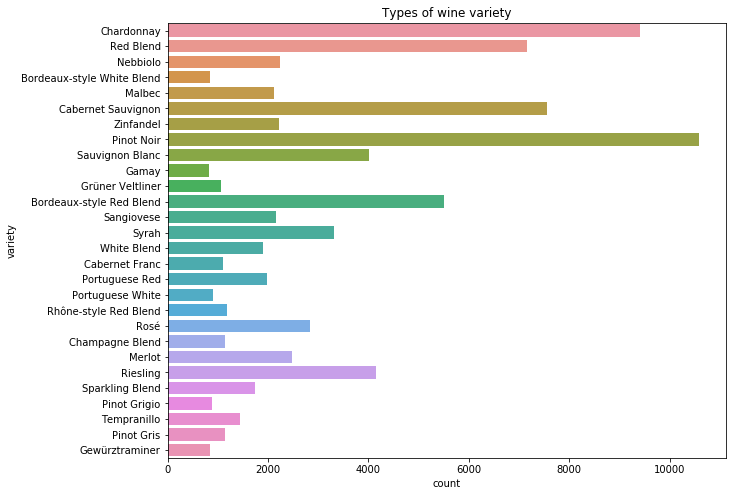

In [82]:
plt.figure(figsize=(10,8))
plt.title("Types of wine variety")
sns.countplot(y=train['variety'])

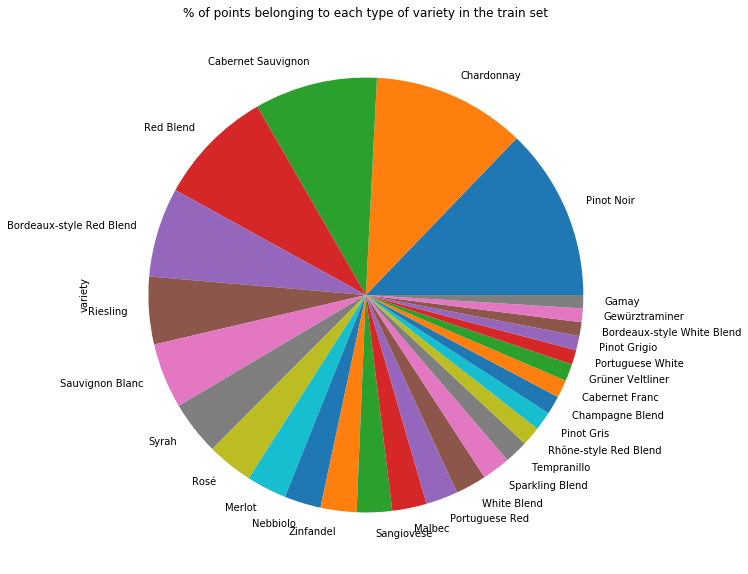

In [87]:
plt.figure(figsize=(10,10))
plt.title('% of points belonging to each type of variety in the train set')
train['variety'].value_counts().plot.pie()

<h3 style ="color:darkred;">3.2 Multivariate analysis</h3>

<h4 style ="color:crimson;">3.2.1 Price of wine and its origin country</h4>

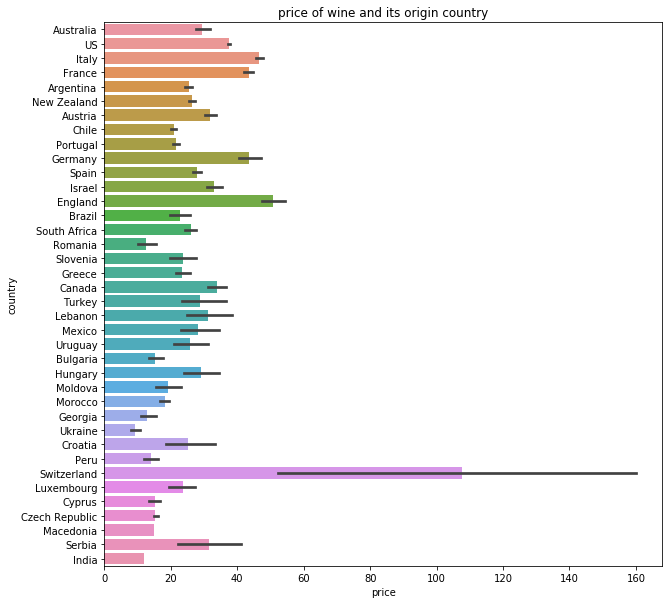

In [111]:
plt.figure(figsize=(10,10))
plt.title('price of wine and its origin country')
sns.barplot(y=train['country'],x=train['price'])

<h4 style ="color:crimson;">3.2.2 Price of wine and its specific growing place</h4>

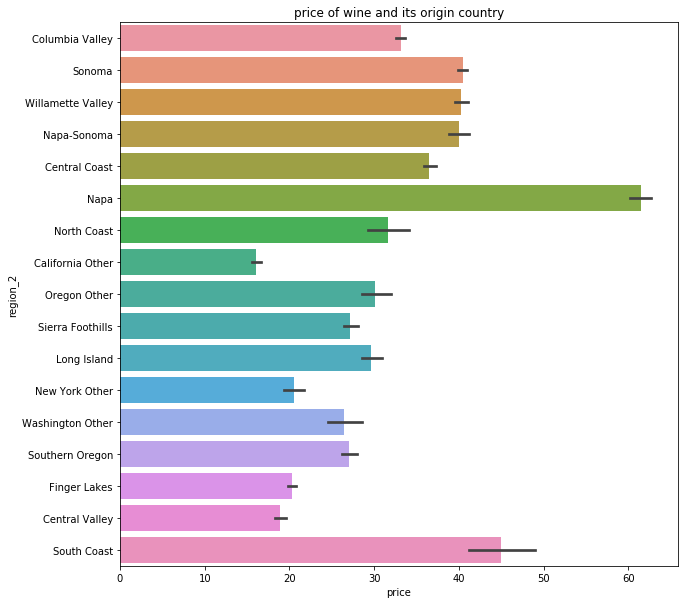

In [112]:
plt.figure(figsize=(10,10))
plt.title('price of wine and its origin country')
sns.barplot(y=train['region_2'],x=train['price'])

<h4 style ="color:crimson;">3.2.3 Countries and their wine exports</h4>

In [212]:
country_values = train['country'].unique()
temp={}
for i in country_values:
    temp[i] = list(np.unique(train[train.country==i].variety))

<h3 style ="color:darkred;">3.3 Analyzing text features</h3>

<h4 style ="color:crimson;">3.3.1 Analyzing review title</h4>

In [214]:
train['review_title'].describe()

count                                                 82657
unique                                                76983
top       Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...
freq                                                      8
Name: review_title, dtype: object

In [216]:
train['review_title'].value_counts()[:30]

Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma County)                8
Korbel NV Brut Sparkling (California)                                 8
Segura Viudas NV Extra Dry Sparkling (Cava)                           7
Ruinart NV Brut Rosé  (Champagne)                                     7
Gloria Ferrer NV Blanc de Noirs Sparkling (Carneros)                  7
Heidsieck & Co Monopole NV Blue Top Brut  (Champagne)                 5
Jacquart NV Brut Mosaïque  (Champagne)                                5
J. Dumangin Fils NV Le Rosé Premier Cru Brut  (Champagne)             5
J Vineyards & Winery NV Brut Rosé Sparkling (Russian River Valley)    5
Mailly Grand Cru NV Délice Demi-Sec  (Champagne)                      5
Pierre Sparr NV Brut Réserve Sparkling (Crémant d'Alsace)             5
Mailly Grand Cru NV Blanc de Noirs Brut Pinot Noir (Champagne)        5
Bailly-Lapierre NV Brut  (Crémant de Bourgogne)                       5
Boizel NV Brut Réserve  (Champagne)                             

<h4 style ="color:crimson;">3.3.1 Analyzing review description</h4>

In [217]:
train['review_description'].describe()

count                                                 82657
unique                                                77628
top       From the home estate of wine academic and guru...
freq                                                      2
Name: review_description, dtype: object

<h2 style ="color:maroon;">4. Data pre-prerocessing</h2>